In [1]:
import numpy as np 
import pandas as pd 

In [2]:
# Importing necessary liabraries

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

import warnings
warnings.filterwarnings("ignore")# Importing necessary liabraries

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [6]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
## Droping the features which are not required

In [8]:
df2 = df1.drop(["area_type","availability","society","balcony"], axis = 1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
## Checking and Handling the Null Values

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df2.shape

(13320, 5)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [13]:
df3.shape

(13246, 5)

In [14]:
## Feature Engineering

In [15]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3["size"].nunique()

31

In [17]:
## For "size" we have different types of values like - "BHK", "Bedroom" which means the same.
## So removing all these strings and creating a column with integers only.

In [18]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split(" ")[0]))
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
df3.drop("size", axis=1, inplace=True)
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [20]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [21]:
## For No of Bedrooms there are some values which are normally not possible like - 43,27.

In [22]:
df3[df3.bhk>20]

,location,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,8000,27.0,230.0,27
4684,Munnekollal,2400,40.0,660.0,43


In [23]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [24]:
## There are some values in the range. So it is necessary to treat these values.

In [25]:
def is_float(x):  # x contains string values only.
    try:
        float(x)  # Values of x which can be converted into float numbers.
    except:
        return False
    return True

# Returns the values which can be converted into float datatype only.

In [26]:
df3[df3["total_sqft"].apply(is_float)].head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [27]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

# Returns the values which are not of float dataype.

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [28]:
# Above shows that total_sqft can be a range (e.g. 2100-2850). 
# For such case we can just take average of min and max value in the range.

def convert_range_to_num(x):
    numbers = x.split("-")
    if len(numbers)==2:
        return (float(numbers[0])+float(numbers[1]))/2
    try:
        return float(x)
    except:
        return None

In [29]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_range_to_num)
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [30]:
df4.total_sqft.isnull().sum()

46

In [31]:
df4.dropna(inplace=True)
df4.shape

(13200, 5)

In [32]:
## Feature Engineering Techniques
## Adding a new feature called price per square feet

In [33]:
df5 = df4.copy()
df5["price_per_sqft"] = df5["price"]*100000/df5["total_sqft"]
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [34]:
df5.location.nunique()

1298

In [35]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [36]:
## Examine locations which is a categorical variable. 
## We need to apply dimensionality reduction technique here to reduce number of locations

In [37]:
df5.location = df5.location.apply(lambda x: x.strip())
# leading and trailing whitespace removed by using strip()

In [38]:
location_stats = df5["location"].value_counts(ascending = False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [39]:
len(location_stats)

1287

In [40]:
len(location_stats[location_stats<=10])

1047

In [41]:
## Dimensionality Reduction
#### Any location having less than 10 data points should be tagged as "other" location.

In [42]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [43]:
df5.location.nunique()

1287

In [44]:
df5.location = df5.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5.location.nunique()

241

In [45]:
### We have reduced number of data points in location column from 1293 to only 242.
### It will help us in OneHotEncoding

In [46]:
## Outlier Detection and Outlier Removal

In [47]:
## As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
## We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [48]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [49]:
df5.shape

(13200, 6)

In [50]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 6)

In [51]:
## Outlier Removal Using Standard Deviation and Mean

In [52]:
df6["price_per_sqft"].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [53]:
## Here we see that there is wide variation in min and max price per sqft.

In [54]:
def remove_outliers(df):
    df_out = pd.DataFrame() # Blank dataframe
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[((subdf.price_per_sqft)>(m-std)) & ((subdf.price_per_sqft)<(m+std))]
        # Outlier detection and removal using mean and one standard deviation
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7 = remove_outliers(df6)
df7.shape

(10242, 6)

In [55]:
## Checking for a given location how does 2 BHK and 3 BHK property prices look like

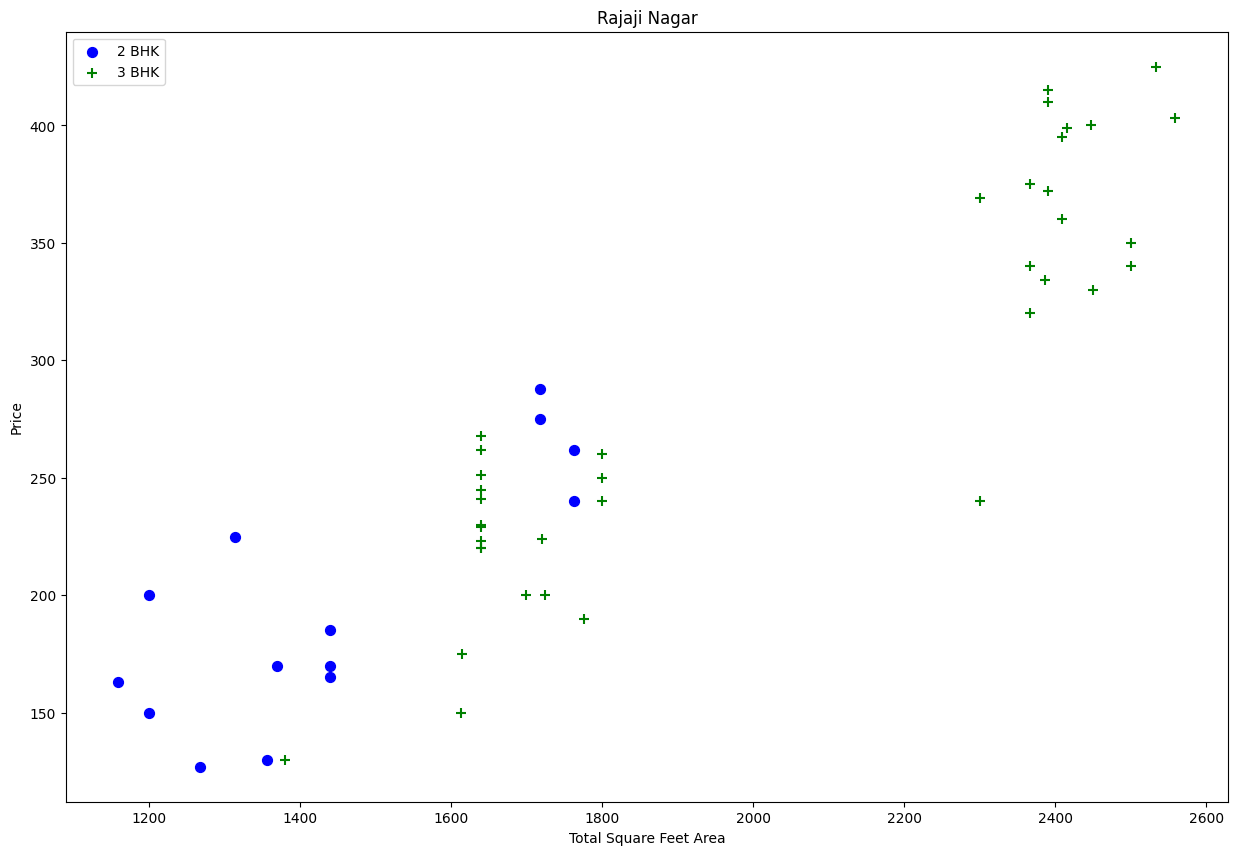

In [56]:
def scatter_plot(df, location):
    bhk2 = df[(df["location"] == location) & (df.bhk==2)]
    bhk3 = df[(df["location"] == location) & (df.bhk==3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = "blue", label = "2 BHK", s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker = "+", color = "green", label = "3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    plt.show()
    
scatter_plot(df7,"Rajaji Nagar")

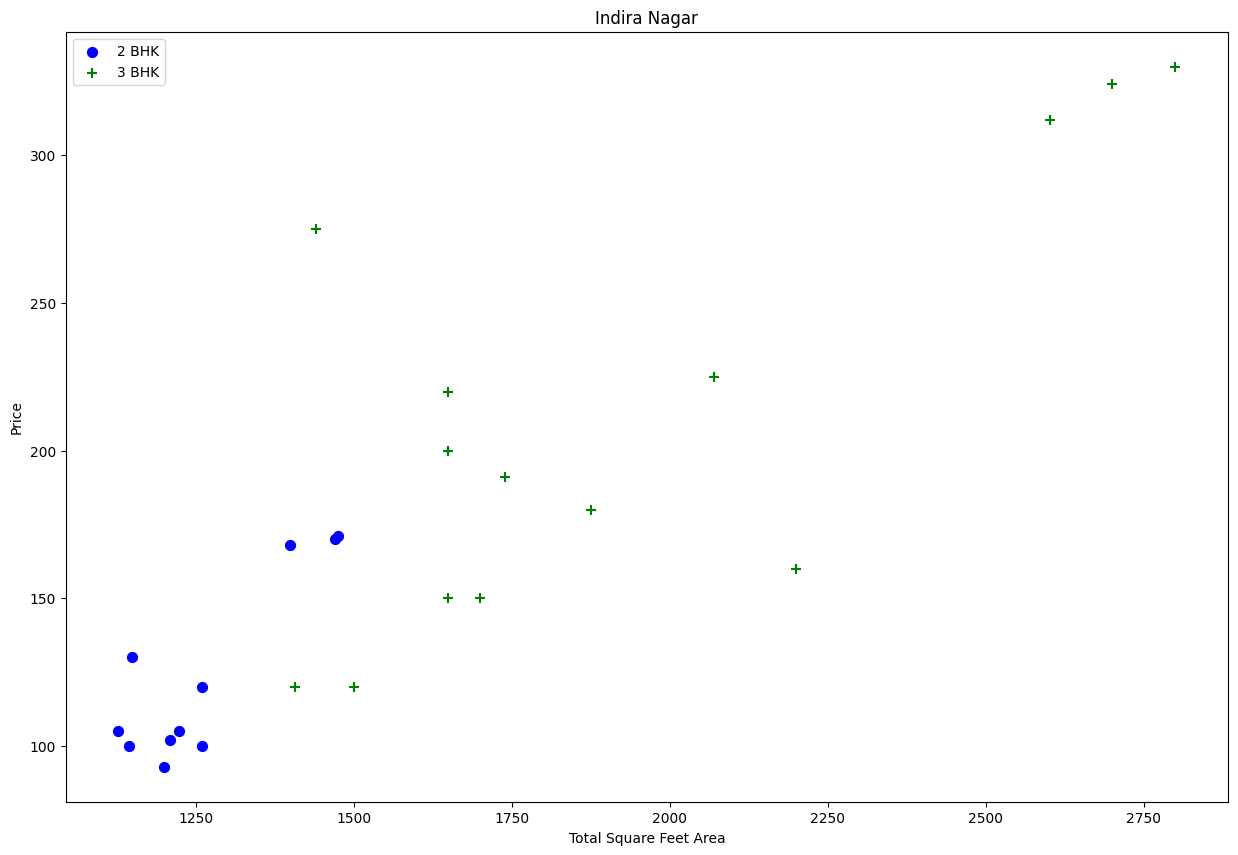

In [57]:
scatter_plot(df7,"Indira Nagar")

In [58]:
#### There are some properties where for the same location price of 2 BHK are higher than 3 BHK with same square feet area. 
#### for a given location, we will build a dictionary of stats per bhk, i.e. - 
#      {
#          "1":{
#              "mean" : 4000,
#              "std" :2000,
#              "count" :34
#          },
#          "2" : {
#              "mean" : 4300,
#              "std" :2300,
#              "count" :22
#          },
#      }
    
#### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [59]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df7.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8 = remove_bhk_outliers(df7)

df8.shape



(7317, 6)

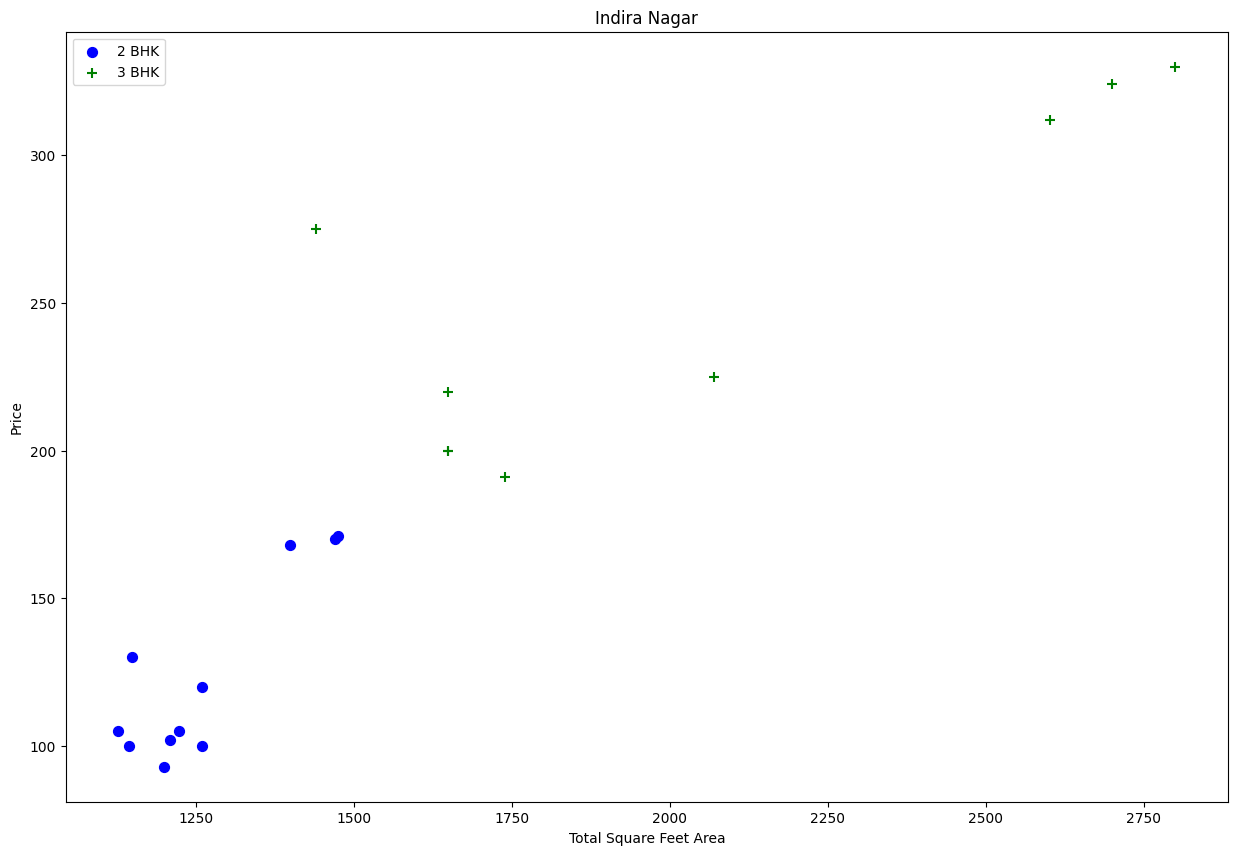

In [60]:
scatter_plot(df8,"Indira Nagar")


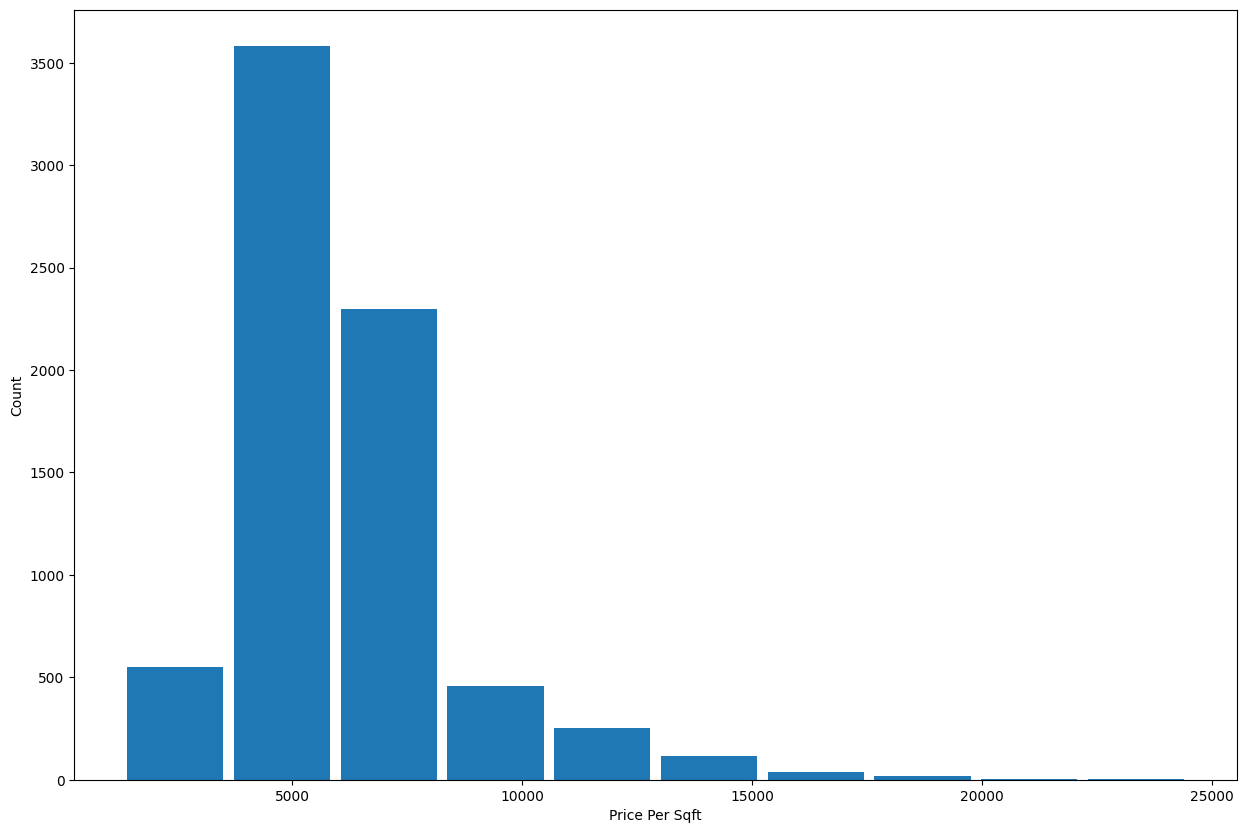

In [61]:
plt.hist(df8.price_per_sqft, rwidth=0.9)
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()


In [62]:
## Outlier Removal Using Bathrooms Feature


In [63]:
df8.bath.unique()


array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

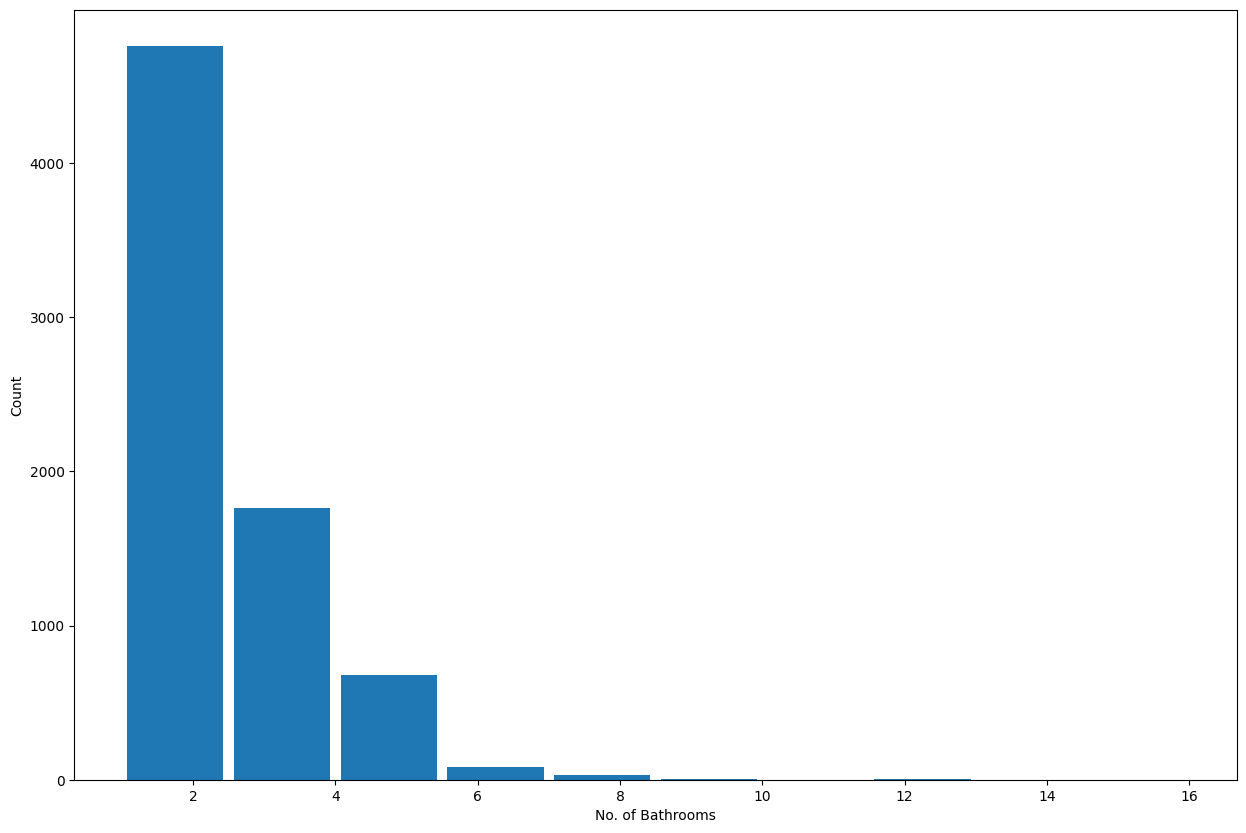

In [64]:
plt.hist(df8.bath, rwidth = 0.90)
plt.xlabel("No. of Bathrooms")
plt.ylabel("Count")
plt.show()


In [65]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8483,other,12000.0,12.0,525.0,10,4375.000000
8572,other,10000.0,16.0,550.0,16,5500.000000
9306,other,6000.0,12.0,150.0,11,2500.000000
9637,other,5425.0,13.0,275.0,13,5069.124424


In [66]:
## It is unusual to have 2 more bathrooms than number of bedrooms in a home. 
## It can be consulted with the business manager that it is unusual to have the above parameter.


In [67]:
df8[df8.bath>df8.bhk+2]


,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8408,other,11338.0,9.0,1000.0,6,8819.897689


In [68]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape


(7239, 6)

In [69]:
df10 = df9.drop("price_per_sqft", axis= 1)
df10.head()


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [70]:
### Using OneHoteEncoding for Location


In [71]:
dummy_df = pd.get_dummies(df10.location)
dummy_df.head()


,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
final_df = pd.concat([df10.drop("location", axis = 1), dummy_df.drop("1st Block Jayanagar", axis = 1)], axis = 1)
final_df.head()


,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
## Building The Model


In [74]:
final_df.shape


(7239, 244)

In [75]:
X = final_df.drop("price", axis=1)
y = final_df["price"]



In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)


In [77]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.8629132245229332

In [78]:
## Using K-Fold Validation for accuracy Measure
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [79]:
## Finding the Best Model using GridSearchCV


In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def best_model_gridsearchcv(X,y):
    algos = {"linear_regression": {"model": LinearRegression(), 
                                   "params":{"normalize":[True, False]
                                    }
                                  },
             "lasso": {"model": Lasso(),
                      "params": {
                          "alpha":[1,2],
                          "selection": ["random", "cyclic"]
                      }
                    },
             "decision_tree":{"model": DecisionTreeRegressor(),
                             "params":{
                                 "criterion":["mse", "friedman_mse"],
                                 "splitter":["best", "random"]
                             }
                    }
            }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size = 0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config["model"], config["params"], cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
        })
    return pd.DataFrame(scores, columns = ["model", "best_score","best_params"])



In [81]:
best_model_gridsearchcv(X_train, y_train)


,model,best_score,best_params
0,linear_regression,0.856053,{'normalize': False}
1,lasso,0.722141,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.793859,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [82]:
#### Based on above results we can say that LinearRegression gives the best score. Hence we will use that.


In [83]:
# Test the model for few properties

def price_predict(location,sqft,bath,bhk):
 
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [84]:
price_predict('1st Phase JP Nagar',1000,2,2)

83.86570258313711

In [85]:
price_predict('1st Phase JP Nagar',1000,2,3)

82.36367614311564

In [86]:
price_predict('5th Phase JP Nagar',1000,2,2)

42.48536275861346

In [87]:
price_predict('Indira Nagar',1000,2,2)

193.31197733179405

In [88]:
price_predict('Whitefield',2002,3,2)

137.7214577887591

In [89]:
price_predict('Nagasandra',3000,2,3)

201.14801599022013

In [92]:
price_predict('Thanisandra',4000,5,5)

299.8354136964996